In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('multiTimeline.csv', skiprows=1)

In [3]:
df.head()

,Week,vegan: (Worldwide)
0,2014-06-01,31
1,2014-06-08,31
2,2014-06-15,31
3,2014-06-22,32
4,2014-06-29,33


In [4]:
df.columns

Index(['Week', 'vegan: (Worldwide)'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Week                  261 non-null object
vegan: (Worldwide)    261 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [6]:
from datetime import datetime

In [7]:
df.Week=pd.to_datetime(df.Week)

In [8]:
df.head()

,Week,vegan: (Worldwide)
0,2014-06-01,31
1,2014-06-08,31
2,2014-06-15,31
3,2014-06-22,32
4,2014-06-29,33


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Week                  261 non-null datetime64[ns]
vegan: (Worldwide)    261 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [10]:
df.set_index('Week', inplace=True)

In [11]:
df.head()

,vegan: (Worldwide)
Week,
2014-06-01,31
2014-06-08,31
2014-06-15,31
2014-06-22,32
2014-06-29,33


In [12]:
df['2015-01']

,vegan: (Worldwide)
Week,
2015-01-04,37
2015-01-11,36
2015-01-18,36
2015-01-25,36


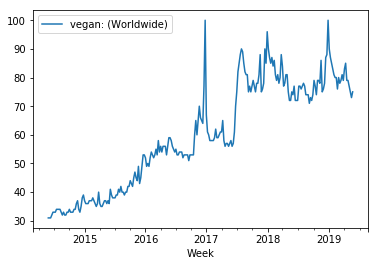

In [13]:
df.plot()

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
vegan=df['vegan: (Worldwide)']

In [16]:
vegan

Week
2014-06-01     31
2014-06-08     31
2014-06-15     31
2014-06-22     32
2014-06-29     33
2014-07-06     33
2014-07-13     33
2014-07-20     34
2014-07-27     34
2014-08-03     34
2014-08-10     34
2014-08-17     33
2014-08-24     32
2014-08-31     33
2014-09-07     32
2014-09-14     32
2014-09-21     33
2014-09-28     33
2014-10-05     34
2014-10-12     33
2014-10-19     33
2014-10-26     33
2014-11-02     34
2014-11-09     34
2014-11-16     36
2014-11-23     37
2014-11-30     34
2014-12-07     33
2014-12-14     35
2014-12-21     38
             ... 
2018-11-04     79
2018-11-11     78
2018-11-18     86
2018-11-25     75
2018-12-02     76
2018-12-09     78
2018-12-16     87
2018-12-23     88
2018-12-30    100
2019-01-06     90
2019-01-13     87
2019-01-20     85
2019-01-27     83
2019-02-03     81
2019-02-10     80
2019-02-17     80
2019-02-24     76
2019-03-03     80
2019-03-10     78
2019-03-17     79
2019-03-24     81
2019-03-31     79
2019-04-07     83
2019-04-14     85
2019-

# Seasonal Decomposition

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
decomposition = seasonal_decompose(vegan, model='multiplicative', freq=52)
#frequency is the number of data points relative to a year

In [19]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

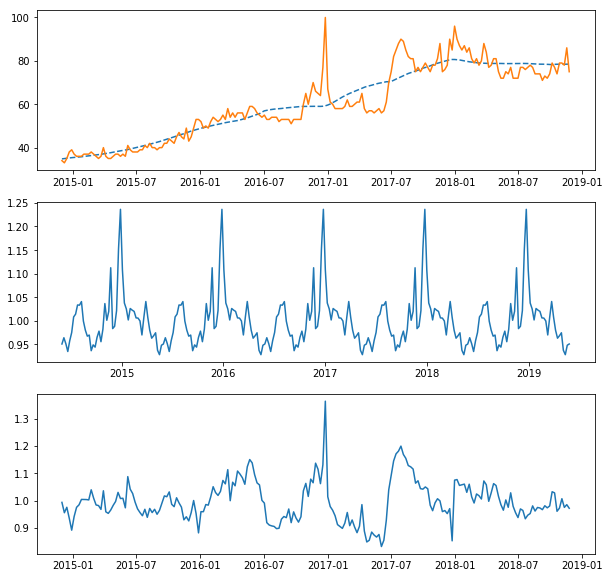

In [20]:
plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(311)

plt.plot(trend, linestyle='--', label='Trend')
plt.plot(trend*residual*seasonal, label='Original')

plt.subplot(312)
plt.plot(seasonal, label='Seasonality')

plt.subplot(313)
plt.plot(residual, label='Randomness')

# ARIMA (p,d,q)

In [21]:
# Arima (refer to follow website for further details: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
# AR (p): Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations (i.e. How can we calculate what happens today given what happened yersterday).
# I (d): Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
# MA (q): Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(0, 50)

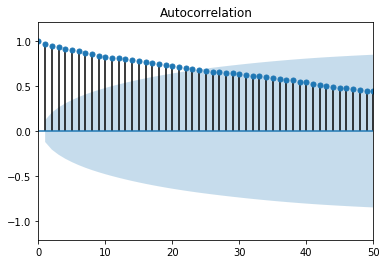

In [23]:
plot_acf(vegan)
plt.xlim(0,50)

In [24]:
diff = vegan.diff(1).dropna()

In [25]:
decomposition = seasonal_decompose(diff, model='additive', freq=52)

In [26]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

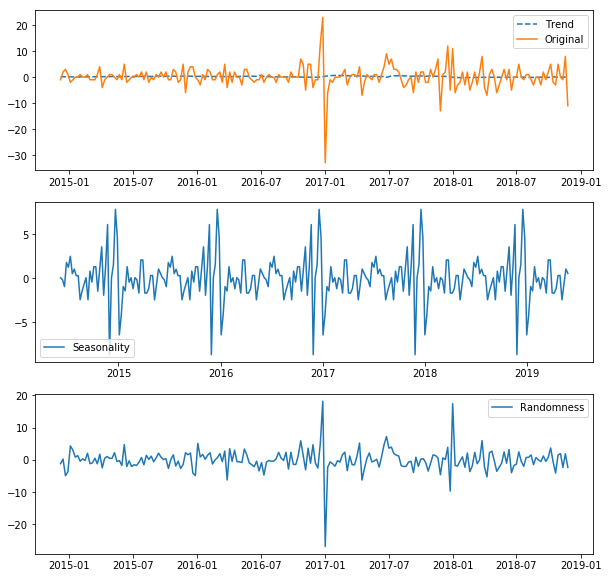

In [27]:
plt.figure(figsize=(10,10))

plt.figure(1)
plt.subplot(311)

plt.plot(trend, linestyle='--', label='Trend')
plt.plot(trend+residual+seasonal, label='Original')
plt.legend()

plt.subplot(312)
plt.plot(seasonal, label='Seasonality')
plt.legend()

plt.subplot(313)
plt.plot(residual, label='Randomness')
plt.legend()

# d=1

# Finding q

(0, 10)

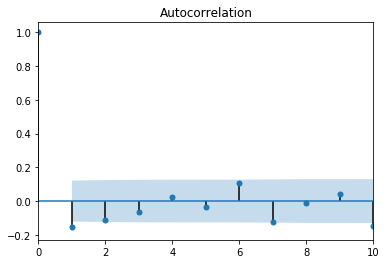

In [28]:
plot_acf(diff)
plt.xlim(0,10)

In [29]:
# points withing the blue are insignificant (insignificance region). 

# q = 2

(0, 10)

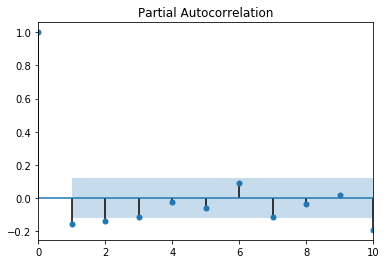

In [30]:
plot_pacf(diff,lags=10)
plt.xlim(0,10)

# p = 3

# ARIMA (3, 1, 2)

In [31]:
train = vegan[:'06-2018']
test = vegan['06-2018':]

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model = SARIMAX(train, order=(3,1,2), seasonal_order=(1,1,0,52), enforce_invertibility=False, enforce_stationarity=False)

T:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [34]:
results = model.fit()

In [35]:
predict = results.predict(start='06-2018', end='06-2019')

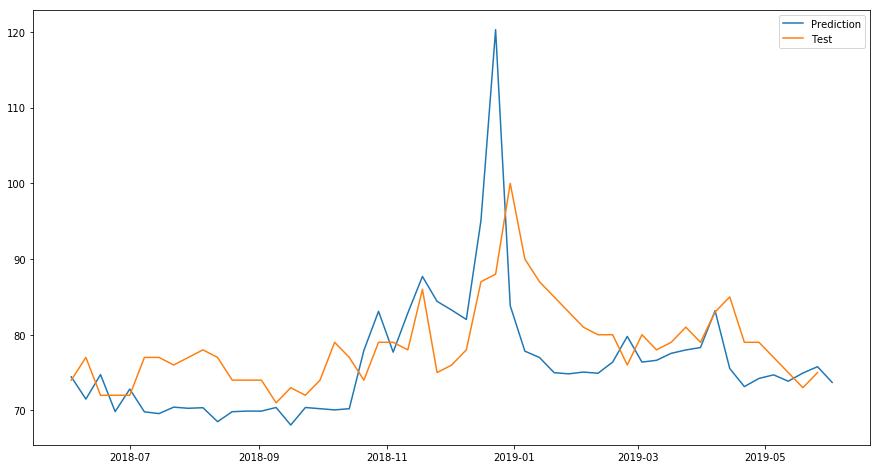

In [36]:
plt.figure(figsize=(15,8))

plt.figure(1)
plt.plot(predict, label='Prediction')
plt.plot(test, label='Test')
plt.legend()

In [37]:
train = vegan[:'06-2018']
test = vegan['06-2014':]

In [38]:
full_predict = results.predict(start='06-2014', end='06-2019')[2:]

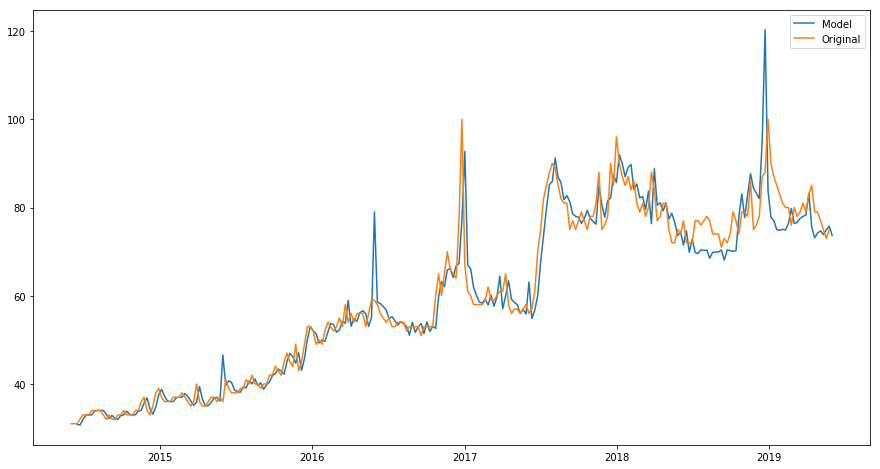

In [39]:
plt.figure(figsize=(15,8))

plt.figure(1)
plt.plot(full_predict, label='Model')
plt.plot(vegan, label='Original')
plt.legend()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                 vegan: (Worldwide)   No. Observations:                  213
Model:             SARIMAX(3, 1, 2)x(1, 1, 0, 52)   Log Likelihood                -320.936
Date:                            Fri, 31 May 2019   AIC                            655.872
Time:                                    17:44:43   BIC                            674.450
Sample:                                06-01-2014   HQIC                           663.400
                                     - 06-24-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2866     14.672     -0.020      0.984     -29.044      28.470
ar.L2         -0.0568      1.382     -0.041      0.967      -2.765       2.651
ar.L3         -0.0402      2.008     -0.020      0.984      -3.975       3.895
ma.L1          0.1251     14.669      0.009      0.993     -28.625      28.875
ma.L2         -0.1386      3.552     -0.039      0.969      -7.101       6.824
ar.S.L52      -1.0790      0.092    -11.695      0.000      -1.260      -0.898
sigma2        26.4482      2.164     12.219      0.000      22.206      30.691
===================================================================================
Ljung-Box (Q):                       15.47   Jarque-Bera (JB):               277.25
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.04
Prob(H) (two-sided):                  0.01   Kurtosis:                        10.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""